In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean1 = test_data.mean(axis=0)
test_data = test_data - mean1

std1 = test_data.std(axis=0)
test_data = test_data / std1

# 검증용 데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=31)


In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121


Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(x_train, y_train, epochs=200, batch_size=4, validation_data=(x_val, y_val))

Epoch 1/200
81/81 [==============================] - 1s 8ms/step - loss: 523.2380 - mae: 21.4084 - val_loss: 454.6362 - val_mae: 20.1606
Epoch 2/200
81/81 [==============================] - 0s 5ms/step - loss: 326.8104 - mae: 16.7703 - val_loss: 163.2204 - val_mae: 11.7474
Epoch 3/200
81/81 [==============================] - 0s 4ms/step - loss: 65.1748 - mae: 6.1748 - val_loss: 20.3938 - val_mae: 3.4055
Epoch 4/200
81/81 [==============================] - 0s 4ms/step - loss: 25.5873 - mae: 3.5508 - val_loss: 20.8350 - val_mae: 3.4575
Epoch 5/200
81/81 [==============================] - 0s 4ms/step - loss: 24.8980 - mae: 3.4484 - val_loss: 20.7201 - val_mae: 3.4761
Epoch 6/200
81/81 [==============================] - 0s 4ms/step - loss: 24.8124 - mae: 3.5136 - val_loss: 20.9019 - val_mae: 3.3979
Epoch 7/200
81/81 [==============================] - 0s 5ms/step - loss: 24.7313 - mae: 3.5438 - val_loss: 22.7143 - val_mae: 3.4659
Epoch 8/200
81/81 [==============================] - 0s 4ms/s

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1556\4027281980.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


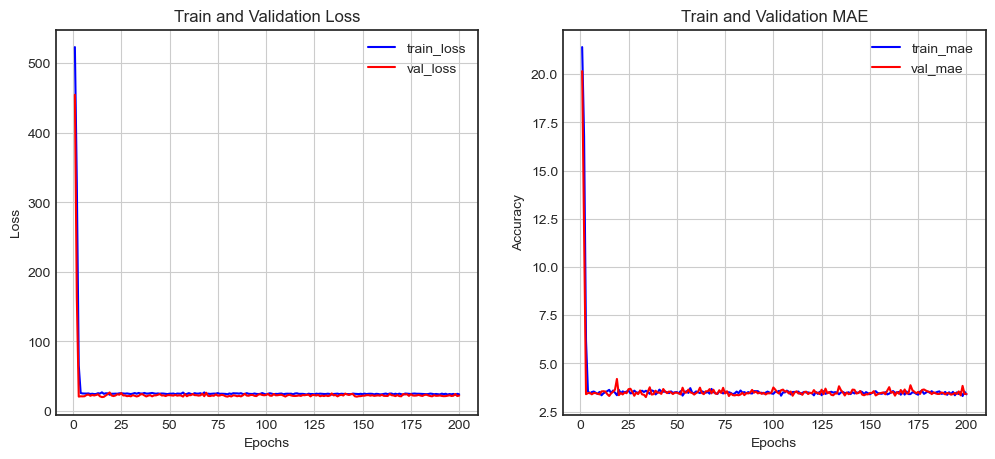

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 21.3844 - mae: 3.3263


[21.384397506713867, 3.3263099193573]